# [Problem 1] Confirmation of competition contents

**What to learn and what to predict**
- To predict how capable each applicant is of repaying a loan

**What kind of file to create and submit to Kaggle?**

- A file predicting the probability for the TARGET variable. And should contain a header of both SK_ID_CURR and TARGET


**What kind of index value will be used to evaluate the submissions?**

- Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection[8] in machine learning.

# [Problem 2] Learning and verification

In [1]:
# importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')
df_train.shape, df_test.shape

((307511, 122), (48744, 121))

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Basic analysis

In [5]:
# shape and size of train set
df_train.shape, df_train.size

((307511, 122), 37516342)

In [6]:
# shape and size of test set
df_test.shape, df_test.size

((48744, 121), 5898024)

In [7]:
# Display the stats about the train data
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Display the stats about the test data
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


# Preprocessing

In [11]:
# Examine the Distribution of the Target Column
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

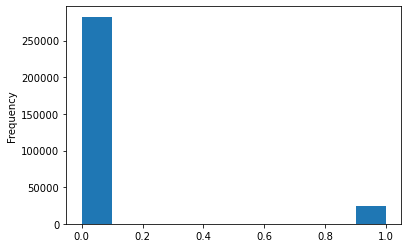

In [12]:
df_train['TARGET'].plot.hist();

In [13]:
df_train[['DAYS_BIRTH']] = df_train[['DAYS_BIRTH']]/-365
df_train[['DAYS_REGISTRATION']] = df_train[['DAYS_REGISTRATION']]/-365
df_train[['DAYS_ID_PUBLISH']] = df_train[['DAYS_ID_PUBLISH']] / -365
df_train[['DAYS_LAST_PHONE_CHANGE']] = df_train[['DAYS_LAST_PHONE_CHANGE']] / -365

In [14]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [15]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [16]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [17]:
 # Total missing values in the train dataset
train_missing_val = df_train.isnull().sum().sort_values(ascending=False)
        
# Percentage of missing values
percent_missing = 100 * train_missing_val / len(df_train)
        
# Make a table with the results
missing_val_table = pd.concat([train_missing_val, percent_missing], axis=1)
        
# Rename the columns
missing_val_table = missing_val_table.rename(
  columns = {0 : 'Missing Values', 1 : 'percentage'}).round(1)

null_table = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table

,Missing Values,percentage
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2


In [18]:
 # Total missing values n the test dataset
test_missing_val = df_test.isnull().sum().sort_values(ascending=False)
        
# Percentage of missing values
percent_missing = 100 * test_missing_val / len(df_train)
        
# Make a table with the results
missing_val_table = pd.concat([test_missing_val, percent_missing], axis=1)
        
# Rename the columns
missing_val_table = missing_val_table.rename(
  columns = {0 : 'Missing Values', 1 : 'percentage'}).round(1)

null_table1 = missing_val_table[missing_val_table.iloc[:, 1]>0]
null_table1

,Missing Values,percentage
COMMONAREA_AVG,33495,10.9
COMMONAREA_MEDI,33495,10.9
COMMONAREA_MODE,33495,10.9
NONLIVINGAPARTMENTS_MEDI,33347,10.8
NONLIVINGAPARTMENTS_AVG,33347,10.8
NONLIVINGAPARTMENTS_MODE,33347,10.8
FONDKAPREMONT_MODE,32797,10.7
LIVINGAPARTMENTS_MODE,32780,10.7
LIVINGAPARTMENTS_MEDI,32780,10.7
LIVINGAPARTMENTS_AVG,32780,10.7


In [19]:
# Number of each type of column
df_train.dtypes.value_counts()
# object columns contain strings and are categorical features. 

float64    68
int64      38
object     16
bool        1
dtype: int64

In [20]:
df_test.dtypes.value_counts()

float64    66
int64      39
object     16
bool        1
dtype: int64

In [21]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
df_train.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


dropping missing values greater > 10

In [23]:
drop_null = null_table[null_table["percentage"] > 0.1].index
app_train =  df_train.drop(drop_null, axis=1)
miss_val = app_train.isnull().sum().sort_values(ascending=False)
miss_val[miss_val>0]

AMT_GOODS_PRICE           278
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

selecting object data types

In [24]:
df_train_objects = app_train.select_dtypes('object')
df_train_objects

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Working,Secondary / secondary special,Separated,With parents,THURSDAY,Services
307507,Cash loans,F,N,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,MONDAY,XNA
307508,Cash loans,F,N,Y,Working,Higher education,Separated,House / apartment,THURSDAY,School
307509,Cash loans,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 1


In [25]:
# remaining columns with missing values
df_train_objects.isnull().sum()


NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [26]:
# we need to drop the same columns in the the test dataset
app_test = df_test.drop(drop_null, axis=1)
miss_val = app_test.isnull().sum().sort_values(ascending=False)
miss_val[miss_val>0]

AMT_ANNUITY    24
dtype: int64

selecting object data types

In [27]:
df_test_object = app_test.select_dtypes('object')
df_test_object

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Working,Higher education,Married,House / apartment,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,Working,Higher education,Married,House / apartment,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,FRIDAY,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Working,Secondary / secondary special,Widow,House / apartment,WEDNESDAY,Other
48740,Cash loans,F,N,N,Commercial associate,Secondary / secondary special,Married,House / apartment,MONDAY,Trade: type 7
48741,Cash loans,F,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,WEDNESDAY,Business Entity Type 3
48742,Cash loans,M,N,N,Commercial associate,Higher education,Married,House / apartment,MONDAY,Self-employed


In [28]:
# remaining columns with missing values
miss_val0 = df_test_object.isnull().sum()
missing_val0 = miss_val0[miss_val0>0]
missing_val0

Series([], dtype: int64)

In [29]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
train_object = app_train.dtypes[app_train.dtypes == 'object'].index
train_object

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [31]:
for i in train_object:
    app_train[i] = le.fit_transform(app_train[i])
    app_test[i] = le.fit_transform(app_test[i])


In [32]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  int32  
 12  NAME_EDUCATION_TYPE          307511 non-null  int32  
 13 

In [33]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  int32  
 2   CODE_GENDER                  48744 non-null  int32  
 3   FLAG_OWN_CAR                 48744 non-null  int32  
 4   FLAG_OWN_REALTY              48744 non-null  int32  
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_INCOME_TYPE             48744 non-null  int32  
 11  NAME_EDUCATION_TYPE          48744 non-null  int32  
 12  NAME_FAMILY_STATUS           48744 non-null  int32  
 13  NAME_HOUSING_TYP

In [34]:
#checking for missing values again
app_train.isna().sum()[app_train.isna().sum()>0]

AMT_ANNUITY                12
AMT_GOODS_PRICE           278
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

In [35]:
app_train['CNT_FAM_MEMBERS'].describe() 

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [36]:
app_test.isna().sum()[app_test.isna().sum()>0]

AMT_ANNUITY    24
dtype: int64

In [37]:
app_test[['AMT_ANNUITY']]

,AMT_ANNUITY
0,20560.5
1,17370.0
2,69777.0
3,49018.5
4,32067.0
...,...
48739,17473.5
48740,31909.5
48741,33205.5
48742,25128.0


In [38]:
#data cleaning
train_col = app_train.columns
train_col


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FL

In [39]:
cols = train_col.drop('TARGET')

In [40]:
for i in cols:
    app_train[i] = app_train[i].fillna((app_train[i].mean()))
    app_test[i] = app_test[i].fillna((app_test[i].mean()))
    

In [41]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,False
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,False
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,False


In [42]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_ANOM
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,0,False
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,0,False
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,0,False
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,0,False
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,0,False


In [43]:
# creating the x and y dataset
X = app_train.drop(['TARGET'], axis=1)
y = app_train[['TARGET']]
X.shape, y.shape

((307511, 58), (307511, 1))

In [44]:
# split and standardize dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

In [45]:
# LEARNING AND ESTIMATING
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('prediction', y_pred_dt)
# Evaluation
roc_auc_score(y_test, y_pred_dt)

prediction [0 0 0 ... 0 0 0]


0.519820263695478

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('prediction', y_pred_rf)
# Evaluation
roc_auc_score(y_test, y_pred_rf)

prediction [0 0 0 ... 0 0 0]


0.4999929335613438

# [problem 3] Estimation on the test data

Estimating

In [48]:
print('Train', app_train.shape)
print('Test ', app_test.shape)

Train (307511, 59)
Test  (48744, 58)


In [49]:
test = scaler.fit_transform(app_test)

#### Predict using Decision Tree

In [50]:
y_pred_dt1 = dt.predict(test)

In [51]:
y_pred_dt1.shape

(48744,)

In [52]:
app_test['TARGET'] = y_pred_dt1

In [53]:
submit_1 = app_test.loc[:,('SK_ID_CURR', 'TARGET')]
submit_1.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,1
3,100028,0
4,100038,0


In [54]:
submit_1.to_csv("submit_1.csv", index=False)

<img src="submit_1.jpg"/>

# [Problem 4] Feature engineering

### Feature Importance

In [55]:
print(dt.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.DataFrame(dt.feature_importances_, index=X.columns)
feat_importances.head()

[8.86841768e-02 2.41438619e-03 5.33494041e-03 6.03462378e-03
 8.45001801e-03 9.84036603e-03 5.50645454e-02 5.74596400e-02
 7.67340400e-02 4.25388932e-02 1.12623503e-02 1.06746086e-02
 1.61002656e-02 1.04616947e-02 5.64031891e-02 9.09248267e-02
 8.99755822e-02 8.36074256e-02 0.00000000e+00 9.87478812e-04
 7.14609700e-03 5.86965218e-04 7.79142984e-03 5.04462867e-03
 1.33064058e-02 4.70398701e-03 7.09432793e-03 2.74866573e-02
 4.43913076e-02 1.97188735e-03 2.23796405e-03 2.35961481e-03
 5.35735543e-03 6.00732759e-03 6.54008208e-03 4.14111110e-02
 7.49865153e-02 7.88171585e-05 3.96693204e-03 0.00000000e+00
 2.28439896e-03 2.58091118e-03 2.12881112e-05 2.49304170e-03
 9.31712128e-04 0.00000000e+00 4.64790249e-04 0.00000000e+00
 4.68680988e-04 3.50532504e-04 1.76000107e-04 1.24691060e-03
 9.72976181e-05 1.17653687e-03 3.04641282e-04 2.06692935e-04
 2.57440955e-04 1.51665928e-03]


,0
SK_ID_CURR,0.088684
NAME_CONTRACT_TYPE,0.002414
CODE_GENDER,0.005335
FLAG_OWN_CAR,0.006035
FLAG_OWN_REALTY,0.008450


In [56]:
selected_feat = feat_importances.head(20).index
selected_feat

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE'],
      dtype='object')

In [58]:
selected_feat

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE'],
      dtype='object')

In [59]:

x1 = app_train[selected_feat[0:2]]
x2 = app_train[selected_feat[0:4]]
x3 = app_train[selected_feat[0:8]]
x4 = app_train[selected_feat[0:10]]
x5 = app_train[selected_feat[0:16]]
x6 = app_train[selected_feat[0:20]]
x7= app_train[selected_feat]

In [60]:
def feature(X, feature):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    
    roc_auc_score(y_test, y_pred)
    print(f'Roc score for {feature} is:{roc_auc_score(y_test, y_pred)}')

In [61]:
feature(x1, 'x1')

Roc score for x1 is:0.4969072870349652


In [62]:
feature(x2, 'x2')

Roc score for x2 is:0.5037538623921549


In [63]:
feature(x3, 'x3')

Roc score for x3 is:0.5120508112264766


In [64]:
feature(x4, 'x4')

Roc score for x4 is:0.5219077630661118


In [65]:
feature(x5, 'x5')

Roc score for x5 is:0.5192478362649319


In [66]:
feature(x6, 'x6')

Roc score for x6 is:0.5157620977487872


In [67]:
feature(x7, 'x7')

Roc score for x7 is:0.5151993719876794


### Estimate for the most accurate features

In [68]:
# Align the training and testing data, keep only columns present in both dataframes
x5, app_test = x5.align(app_test, join = 'inner', axis = 1)

In [69]:
app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH'],
      dtype='object')

In [70]:
test1 = scaler.fit_transform(app_test)

In [71]:
y = app_train[['TARGET']]

In [77]:
X5_train, X5_test, y_train, y_test = train_test_split(x5, y, test_size=0.25) 

In [78]:
scaler = StandardScaler()
scaler.fit(X5_train)
X6_train = scaler.transform(X5_train)
X6_test = scaler.transform(X5_test)

In [82]:
dtr = DecisionTreeClassifier()
dtr.fit(X5_train, y_train)
y_pred1 = dtr.predict(test1)
y_pred1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = y_pred1
submit_2 = sub

submit_2.to_csv("submit_2.csv", index=False)

<img src="submit_2.jpg"/>